In [1]:
# Read the  Excel file in pandas

import pandas as pd

# Replace 'your_excel_file.xlsx' with the actual path to your Excel file
df = pd.read_excel('/content/20240419 data sample for testing.xlsx')

# You can now work with the data in the DataFrame 'df'
print(df.head())  # Print the first few rows of the DataFrame


   Day  Pageviews  Unique Visitors  Orders
0    1      10000             8000     100
1    2       8500             7200      75
2    3       9200             7800      85
3    4      11000             8500     120
4    5       9500             7500      90


In [3]:
# Display column names
df.columns

Index(['Day', 'Pageviews', 'Unique Visitors', 'Orders'], dtype='object')

In [4]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for cleaner visualisations
sns.set_style('whitegrid')

# Step 2: Load the dataset
# (Adjust the file path if needed)
# df = pd.read_csv('your_dataset.csv')

# Step 3: Preview the dataset
# print("First few rows of the dataset:")
# print(df.head())

# Step 4: Check data types and missing values
print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

# Convert 'Day' to datetime if it's not already
if df['Day'].dtype != 'datetime64[ns]':
    df['Day'] = pd.to_datetime(df['Day'])

# Check for duplicate days
duplicates = df.duplicated(subset='Day').sum()
print(f"\nNumber of duplicate days: {duplicates}")








Data Types:
Day                int64
Pageviews          int64
Unique Visitors    int64
Orders             int64
dtype: object

Missing Values:
Day                0
Pageviews          0
Unique Visitors    0
Orders             0
dtype: int64

Number of duplicate days: 0


In [5]:
# Step 5: Summary statistics
print("\nSummary Statistics:")
print(df.describe())



Summary Statistics:
                                 Day     Pageviews  Unique Visitors  \
count                             30     30.000000        30.000000   
mean   1970-01-01 00:00:00.000000015  10186.666667      8170.000000   
min    1970-01-01 00:00:00.000000001   8500.000000      6800.000000   
25%    1970-01-01 00:00:00.000000008   9275.000000      7525.000000   
50%    1970-01-01 00:00:00.000000015  10050.000000      8200.000000   
75%    1970-01-01 00:00:00.000000022  10800.000000      8675.000000   
max    1970-01-01 00:00:00.000000030  12500.000000      9800.000000   
std                              NaN   1088.730147       788.779065   

           Orders  
count   30.000000  
mean   104.633333  
min     70.000000  
25%     87.750000  
50%    103.500000  
75%    117.250000  
max    152.000000  
std     21.568629  


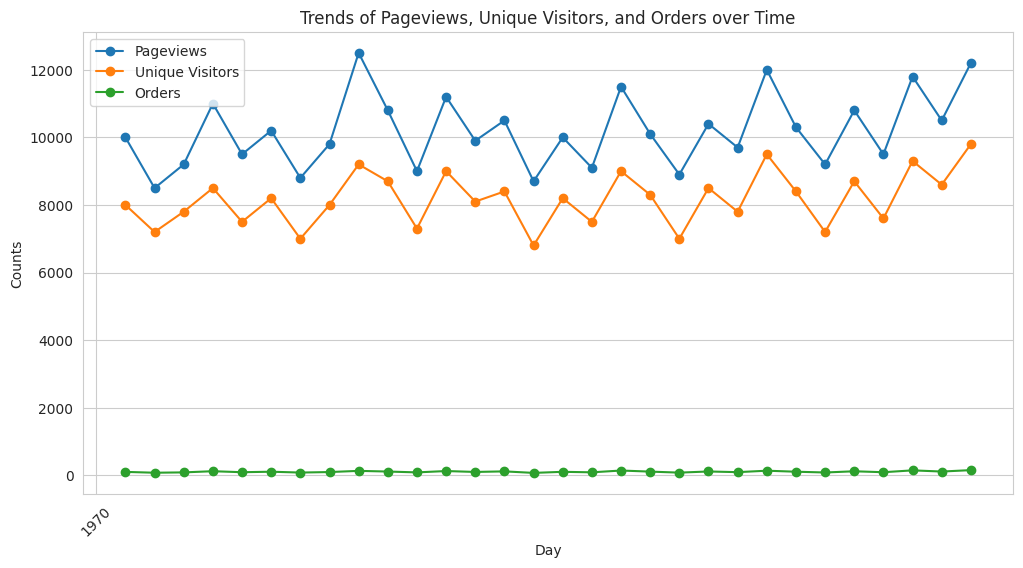

In [7]:
# Step 6: Visualising trends over time
plt.figure(figsize=(12, 6))
plt.plot(df['Day'], df['Pageviews'], label='Pageviews', marker='o')
plt.plot(df['Day'], df['Unique Visitors'], label='Unique Visitors', marker='o')
plt.plot(df['Day'], df['Orders'], label='Orders', marker='o')
plt.xlabel('Day')
plt.ylabel('Counts')
plt.title('Trends of Pageviews, Unique Visitors, and Orders over Time')
# Adjusting the legend to the top-left corner
plt.legend(loc='upper left')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()


# Interpretation of the Trends
From the provided plot, we can observe how Pageviews, Unique Visitors, and Orders fluctuate over time. Below are some key insights from the visualisation:

1. **Pageviews and Unique Visitors**


- There is a noticeable correlation between Pageviews (blue line) and Unique Visitors (orange line), meaning that higher visitor numbers generally result in more pageviews.

- Visitors (orange line), meaning that higher visitor numbers generally result in more pageviews.
- However, the Pageviews curve fluctuates more than the Unique Visitors curve, indicating that, on certain days, individual visitors may view significantly more pages (e.g., during promotional events or content-heavy browsing).
2. **Orders (Green Line)**

- The number of Orders remains consistently low and stable across all days, hovering around zero.
- This suggests either:
- Very few people place orders, despite the significant visitor numbers.
- There might be data collection issues (e.g., incomplete tracking of orders).
3. **Growth Trends**

- There seems to be a slight upward trend in Pageviews and Unique Visitors toward the end of the time period, suggesting an increase in traffic (possibly seasonal or campaign-related).



Correlation Matrix:
                 Pageviews  Unique Visitors    Orders
Pageviews         1.000000         0.966421  0.967493
Unique Visitors   0.966421         1.000000  0.969184
Orders            0.967493         0.969184  1.000000


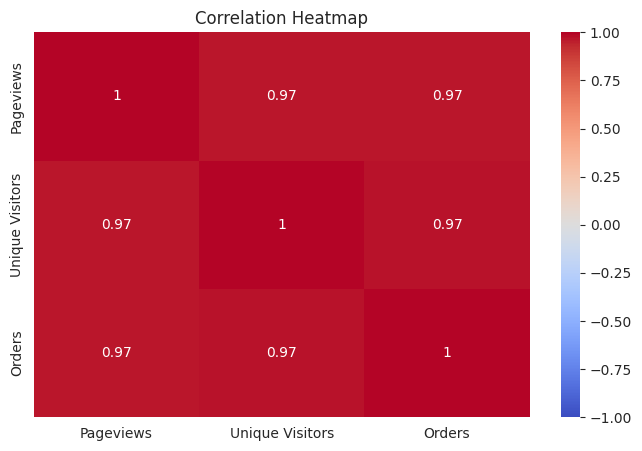

In [8]:
# Step 7: Correlation analysis
correlation_matrix = df[['Pageviews', 'Unique Visitors', 'Orders']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Heatmap for visualising correlations
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


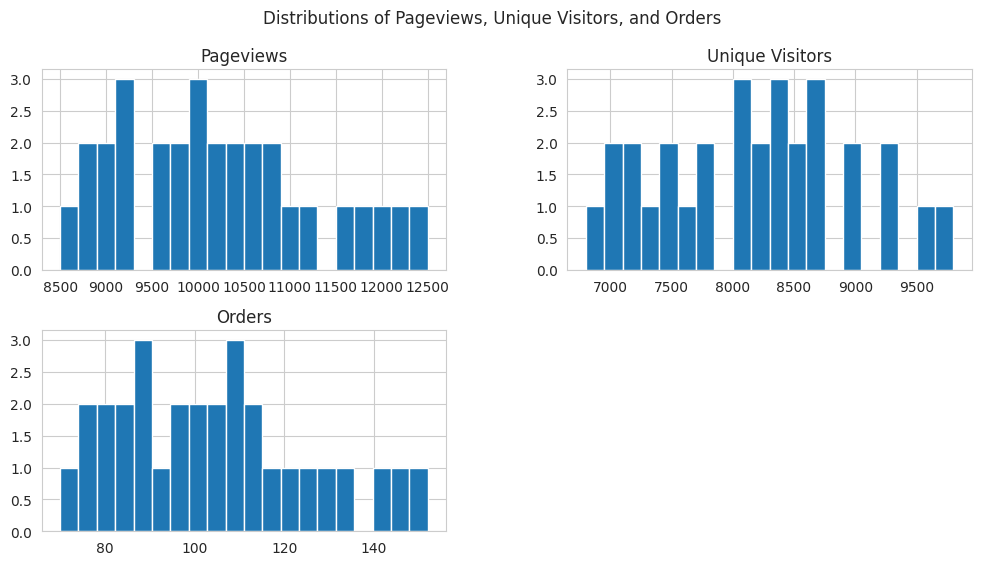

In [9]:
# Step 8: Distribution analysis (Histograms)
df[['Pageviews', 'Unique Visitors', 'Orders']].hist(bins=20, figsize=(12, 6))
plt.suptitle('Distributions of Pageviews, Unique Visitors, and Orders')
plt.show()

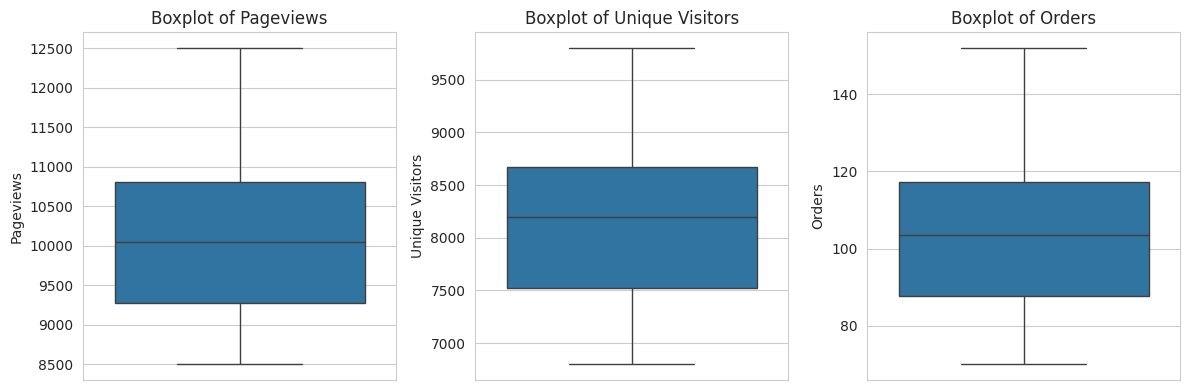

In [10]:
# Step 9: Outlier detection using box plots
plt.figure(figsize=(12, 4))
for i, column in enumerate(['Pageviews', 'Unique Visitors', 'Orders'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()




Conversion Rate (First few rows):
                            Day  Orders  Unique Visitors  Conversion Rate (%)
0 1970-01-01 00:00:00.000000001     100             8000             1.250000
1 1970-01-01 00:00:00.000000002      75             7200             1.041667
2 1970-01-01 00:00:00.000000003      85             7800             1.089744
3 1970-01-01 00:00:00.000000004     120             8500             1.411765
4 1970-01-01 00:00:00.000000005      90             7500             1.200000


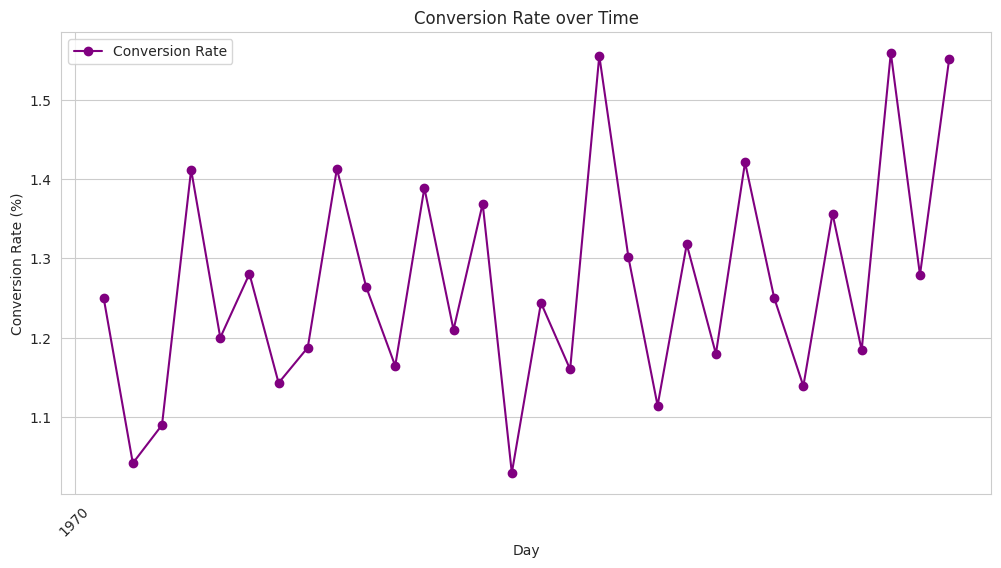

In [11]:
# Step 10: Calculate Conversion Rate
df['Conversion Rate (%)'] = (df['Orders'] / df['Unique Visitors']) * 100
print("\nConversion Rate (First few rows):")
print(df[['Day', 'Orders', 'Unique Visitors', 'Conversion Rate (%)']].head())

# Plot Conversion Rate over time
plt.figure(figsize=(12, 6))
plt.plot(df['Day'], df['Conversion Rate (%)'], label='Conversion Rate', marker='o', color='purple')
plt.xlabel('Day')
plt.ylabel('Conversion Rate (%)')
plt.title('Conversion Rate over Time')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [12]:
# Step 11: Insights from EDA (printed observations)
print("\nKey Insights:")
if correlation_matrix.loc['Pageviews', 'Orders'] > 0.7:
    print("- Strong positive correlation between Pageviews and Orders.")
else:
    print("- Weak correlation between Pageviews and Orders.")

if df['Conversion Rate (%)'].mean() < 5:
    print("- Average conversion rate is below 5%. There might be room for improvement.")
else:
    print("- Conversion rate is healthy.")


Key Insights:
- Strong positive correlation between Pageviews and Orders.
- Average conversion rate is below 5%. There might be room for improvement.


# ML Model Development

**Predictive Modelling for Linear and Multiple Regression**

In [13]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset from the specified path
dataset = pd.read_excel('/content/20240419 data sample for testing.xlsx')

# Display the first few rows of the dataset to understand its structure
print(dataset.head())




   Day  Pageviews  Unique Visitors  Orders
0    1      10000             8000     100
1    2       8500             7200      75
2    3       9200             7800      85
3    4      11000             8500     120
4    5       9500             7500      90


In [14]:
# Split the dataset into features and target variable
X_linear = dataset[['Pageviews']]  # Features for linear regression
X_multiple = dataset[['Pageviews', 'Unique Visitors']]  # Features for multiple regression
y = dataset['Orders']  # Target variable

# Splitting the dataset into training and testing sets
X_train_linear, X_test_linear, y_train, y_test = train_test_split(X_linear, y, test_size=0.2, random_state=42)
X_train_multiple, X_test_multiple = train_test_split(X_multiple, test_size=0.2, random_state=42)





In [15]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train_linear, y_train)

# Predictions for linear regression
y_pred_linear = linear_model.predict(X_test_linear)

# Evaluating the linear regression model
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

print("Linear Regression Results:")
print(f"Mean Squared Error: {linear_mse:.2f}")
print(f"R-squared: {linear_r2:.2f}")

Linear Regression Results:
Mean Squared Error: 109.36
R-squared: 0.63


In [16]:
# Multiple Regression Model
multiple_model = LinearRegression()
multiple_model.fit(X_train_multiple, y_train)

# Predictions for multiple regression
y_pred_multiple = multiple_model.predict(X_test_multiple)

# Evaluating the multiple regression model
multiple_mse = mean_squared_error(y_test, y_pred_multiple)
multiple_r2 = r2_score(y_test, y_pred_multiple)

print("\nMultiple Regression Results:")
print(f"Mean Squared Error: {multiple_mse:.2f}")
print(f"R-squared: {multiple_r2:.2f}")



Multiple Regression Results:
Mean Squared Error: 78.95
R-squared: 0.73


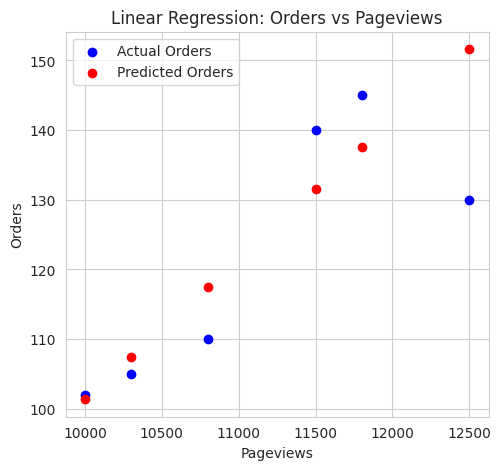

In [17]:
# Visualization (Optional)
plt.figure(figsize=(12, 5))
# Linear Regression Visualization
plt.subplot(1, 2, 1)
plt.scatter(X_test_linear, y_test, color='blue', label='Actual Orders')
plt.scatter(X_test_linear, y_pred_linear, color='red', label='Predicted Orders')
plt.title('Linear Regression: Orders vs Pageviews')
plt.xlabel('Pageviews')
plt.ylabel('Orders')
plt.legend()

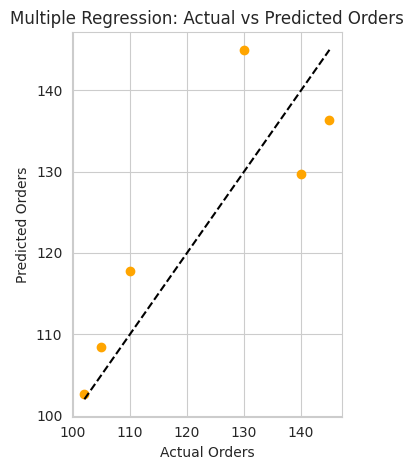

In [18]:
# Multiple Regression Visualization
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_multiple, color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
plt.title('Multiple Regression: Actual vs Predicted Orders')
plt.xlabel('Actual Orders')
plt.ylabel('Predicted Orders')

plt.tight_layout()
plt.show()